# Avocado Market - Time Series Regression

### by ReDay Zarra

This project utilizes **Facebook Prophet** to analyze time series data for avocados from this dataset. The data includes observation dates, average unit price, unit type, region, volume and more. This time series data will then be used to **predict the prices for avocados** at any given date. This project showcases a 
step-by-step implementation of the model as well as in-depth notes to customize the 
model further for higher accuracy.

## Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet

> Pandas is a library used for data frame manipulations. NumPy is a package used for numerical analysis. Matplotlib and Seaborn are used for data visualization. Random will be used to generate random values. Facebook 

## Importing the dataset

Importing the dataset with the .read_csv method from Pandas to load the dataset and storing it in the avocado_df variable. We can take a glimpse at the dataset with the built-in Pandas methods.

In [3]:
avocado_df = pd.read_csv('avocado.csv')

In [7]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Visualizing the dataset

In [8]:
avocado_df = avocado_df.sort_values("Date")

> Using the .sort_values to **sort the dataframe** from the values of the Date column

<Figure size 1500x1500 with 0 Axes>

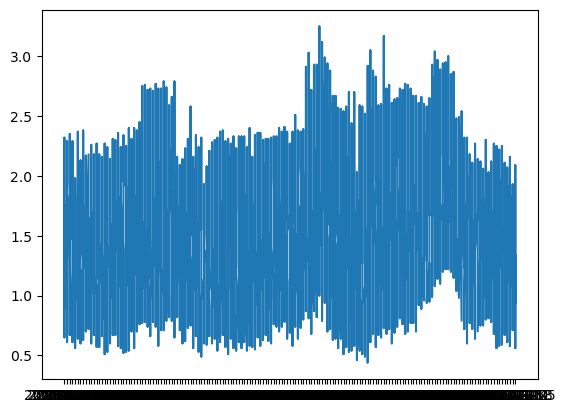

<Figure size 1500x1500 with 0 Axes>

In [11]:
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])
plt.figure(figsize = (15, 15))

<AxesSubplot:xlabel='region', ylabel='count'>

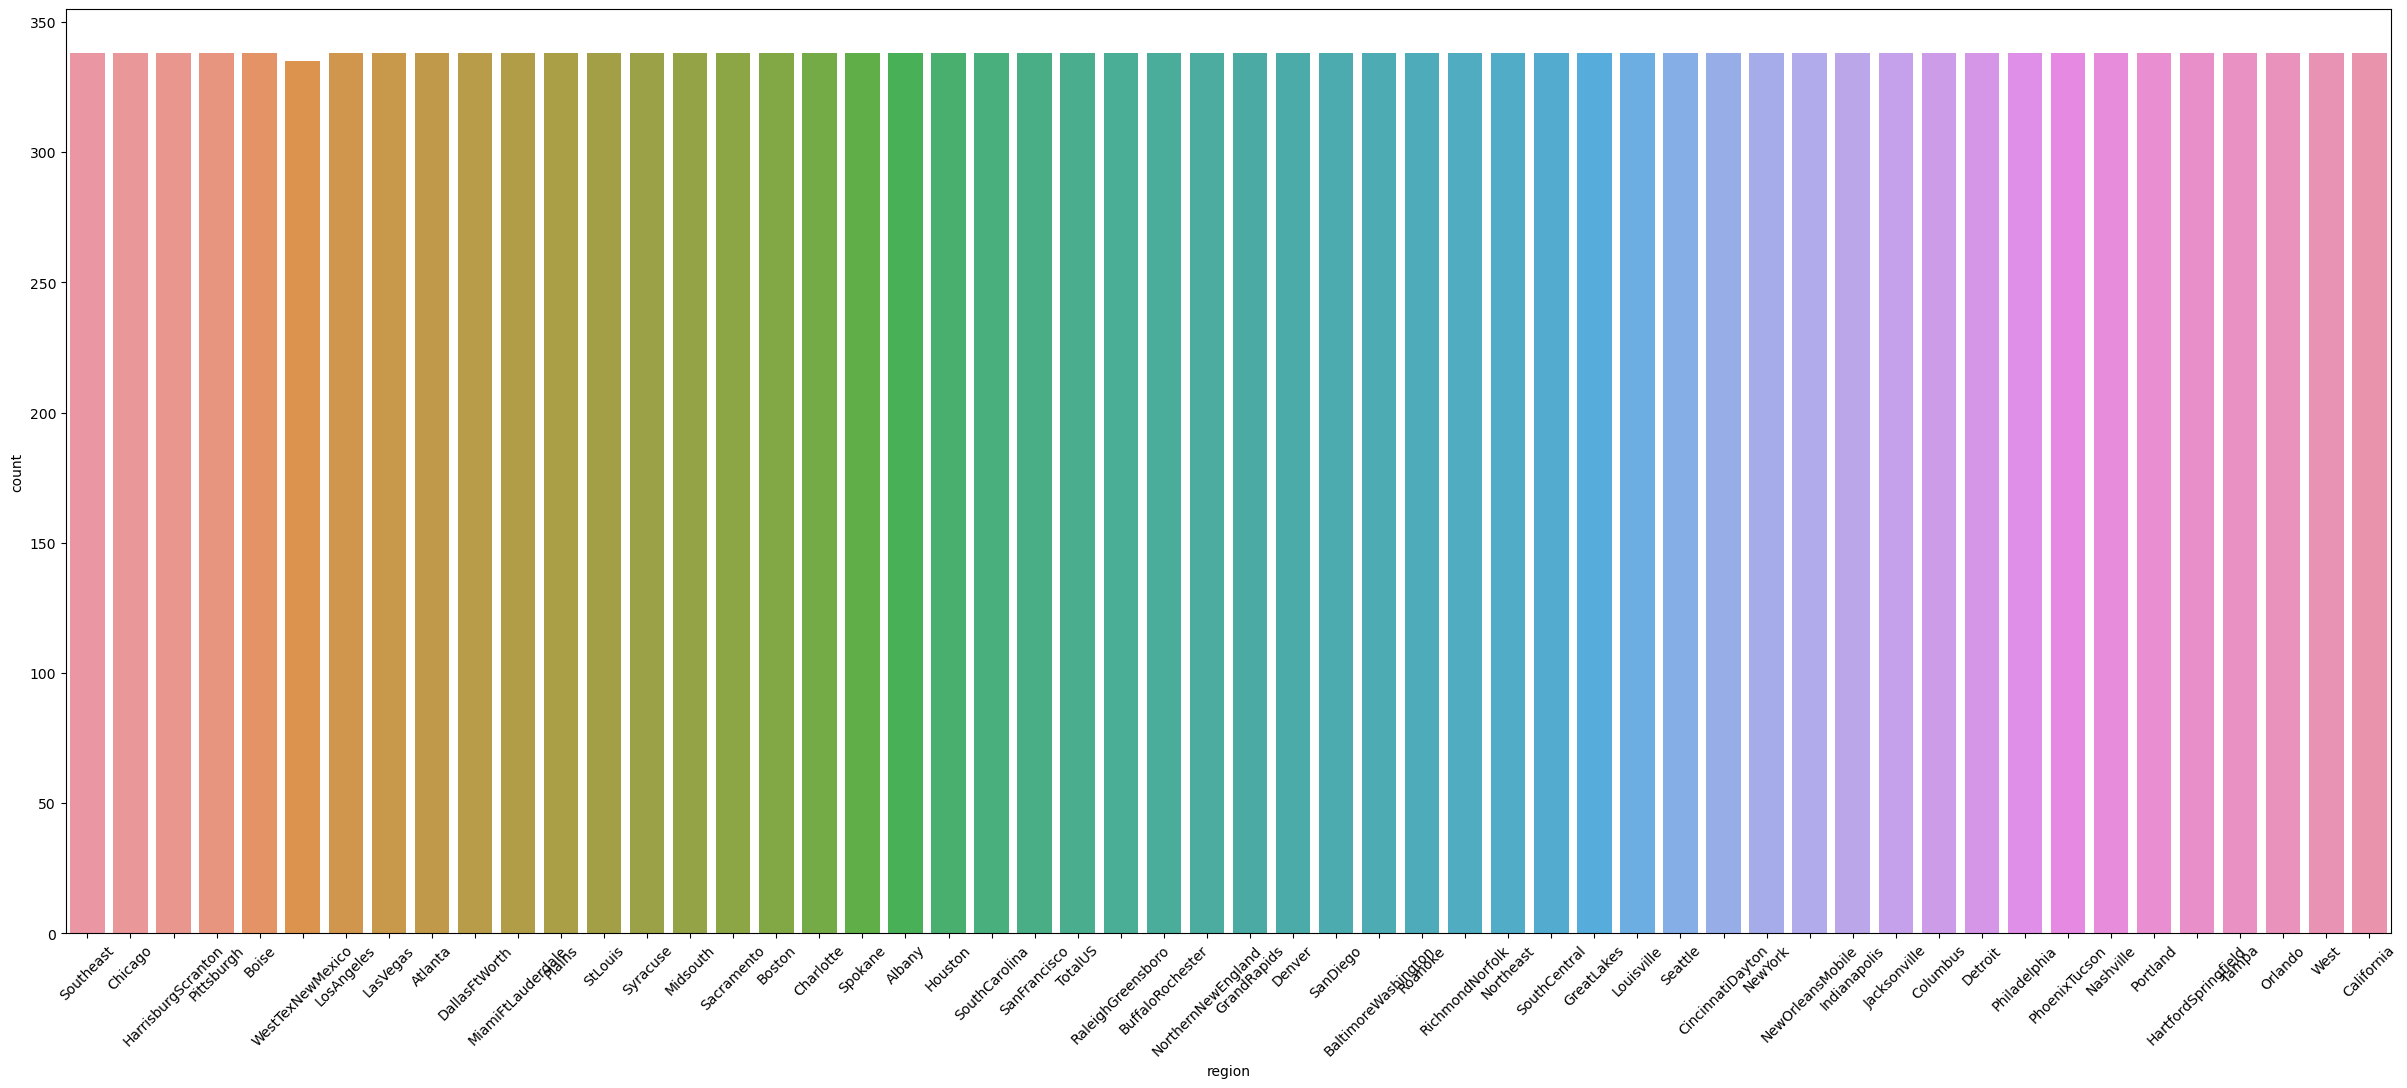

In [26]:
plt.figure(figsize = (30, 12))
plt.xticks(rotation = 45)
sns.countplot(x = 'region', data = avocado_df)

<AxesSubplot:xlabel='year', ylabel='count'>

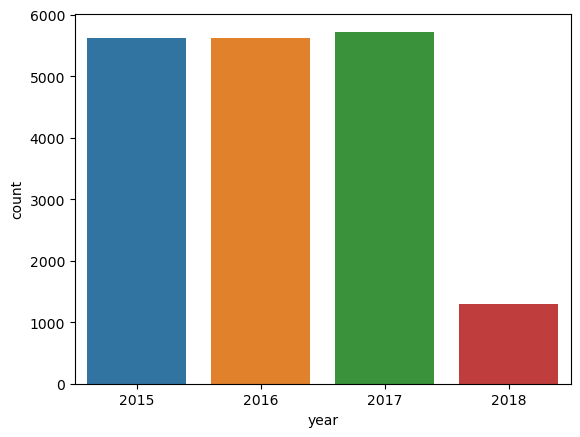

In [27]:
sns.countplot(x = 'year', data = avocado_df)

In [28]:
df_prophet = avocado_df[['Date', 'AveragePrice']]

In [29]:
df_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70
